<a href="https://colab.research.google.com/github/yhjung5810/AI_Exercise/blob/main/w11_text_data_analysis_wordcloud_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week11. 텍스트 데이터의 분석
---

## konlpy


* [konlpy API](https://konlpy.org/ko/latest/api/konlpy.tag/)

* [konlpy 말뭉치](https://konlpy.org/ko/latest/data/#corpora)

* [konlpy 예시](https://konlpy.org/ko/latest/examples/)

In [1]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,254 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 47.1 MB/s eta 0:00:00


In [3]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.sentences('네, 안녕하세요. 반갑습니다.')

['네, 안녕하세요.', '반갑습니다.']

In [8]:
kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']

In [12]:
kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^')

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]

In [9]:
from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(u'단독입찰보다 복수입찰의 경우'))
print(okt.nouns(u'유일하게 항공기 체계 종합개발 경험을 갖고 있는 KAI는'))
print(okt.pos(u'이것도 되나욬ㅋㅋ'))
print(okt.pos('아버지가 방에 들어가신다'))
print(okt.pos('아버지가방에들어가신다'))

['단독', '입찰', '보다', '복수', '입찰', '의', '경우']
['항공기', '체계', '종합', '개발', '경험']
[('이', 'Determiner'), ('것', 'Noun'), ('도', 'Josa'), ('되나욬', 'Noun'), ('ㅋㅋ', 'KoreanParticle')]
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


## Word Count

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

article = '''
강원 동해안 해수욕장 다음 달 8일부터 52일간 개장
피서객 1천500만 명 이상 방문 예상
프린트 카카오톡 이메일 페이스북 트위터 카카오스토리 공유
경포 해수욕장 찾은 피서객. [연합뉴스 자료 사진]
사진설명경포 해수욕장 찾은 피서객. [연합뉴스 자료 사진]
강원 동해안 6개 시군의 해수욕장이 다음 달 8일부터 52일간 문을 연다.
강원도 환동해본부는 동해안 84개 해수욕장을 다음 달 8일 강릉과 양양을 시작으로 8월 28일까지 개장할 계획이라고 5일 밝혔다.
개장 시간은 오전 9시부터 오후 6시까지다.
일부 해수욕장은 성수기(7월 22일∼8월 7일) 야간 입수를 허용할 예정이다.
강릉 경포·속초 해수욕장은 오후 9시까지, 주문진·옥계·정동진·사근진·강문·안목·사천진 등 강릉 지역 7개 해수욕장은 오후 7시까지 각각 입수 시간을 연장하는 방안을 검토하고 있다.
동해안 해수욕장 찾은 피서객.[연합뉴스 자료 사진]
사진설명동해안 해수욕장 찾은 피서객.[연합뉴스 자료 사진]
해수욕장 개장 기간에는 피서객들에 즐거움과 재미를 선사하기 위한 다양한 축제가 열린다.
강릉시는 다음 달 11∼18일 경포 블루페스티벌을, 동해시는 망상 힙합 경연대회를 다음 달 28일부터 8월 2일까지 개최한다.
속초에서는 내달 30일부터 8월 5일까지 썸머 페스티벌이 열린다.
해수욕장을 찾을 피서객들은 바다 여행 홈페이지(바다 여행, seantour.kr)를 통해 미리 해변 혼잡 정도를 확인할 수 있다.
최성균 환동해본부장은 "올해 해수욕장 운영 목표를 관광객 2천만명 달성과 안전사고 제로로 정해 피서객 유치와 물놀이 사고 예방에 온 힘을 기울이겠다"고 말했다.
'''
kkma = Kkma()
tokens = kkma.nouns(article)
counted_tokens = Counter(tokens)
top_20 = counted_tokens.most_common(20)
print(top_20)

[('시', 3), ('강원', 2), ('일', 2), ('동해', 2), ('초', 2), ('동해안', 1), ('해수욕장', 1), ('다음', 1), ('달', 1), ('8', 1), ('8일', 1), ('52', 1), ('개장', 1), ('피서객', 1), ('1', 1), ('1천500만', 1), ('천', 1), ('500', 1), ('만', 1), ('명', 1)]


## Word Cloud

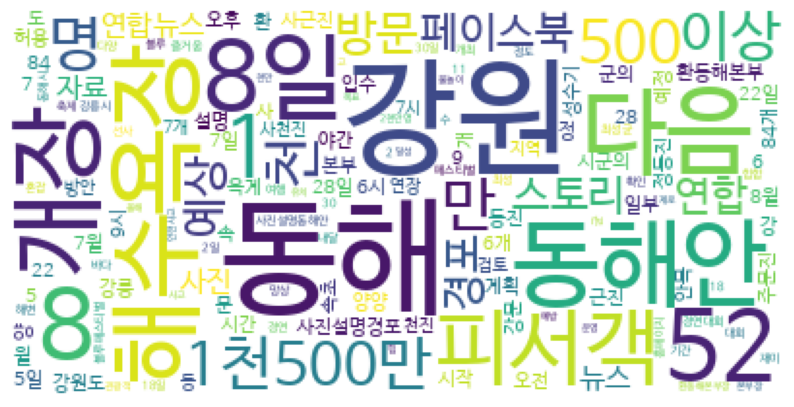

In [16]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', font_path='NanumBarunGothic.ttf')
wc.generate_from_frequencies(counted_tokens)
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [17]:
# 불용어 제거
stop_word = ['프린트', '카카오', '카카오톡', '이메일', '페이스', '북', '트위터', '카카오스토리', '공유', '일', '시', '초', '달']
filtered_tokens = []
for t in tokens:
    if t not in stop_word:
        filtered_tokens.append(t)

counted_tokens = Counter(filtered_tokens)
top_20 = counted_tokens.most_common(20)
print(top_20)

[('강원', 2), ('동해', 2), ('동해안', 1), ('해수욕장', 1), ('다음', 1), ('8', 1), ('8일', 1), ('52', 1), ('개장', 1), ('피서객', 1), ('1', 1), ('1천500만', 1), ('천', 1), ('500', 1), ('만', 1), ('명', 1), ('이상', 1), ('방문', 1), ('예상', 1), ('페이스북', 1)]


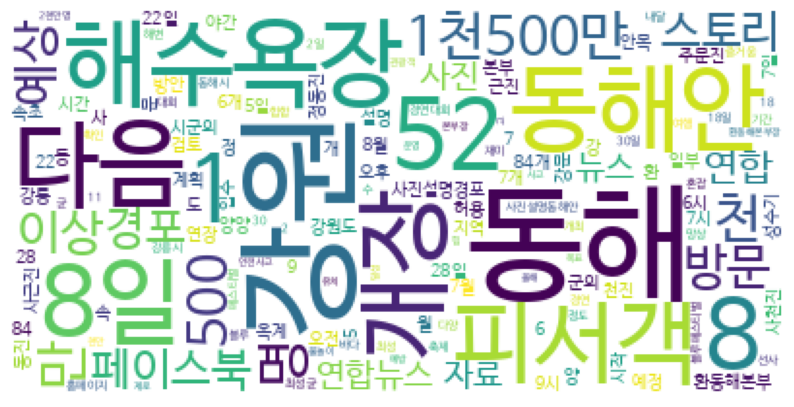

In [18]:
wc.generate_from_frequencies(counted_tokens)
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

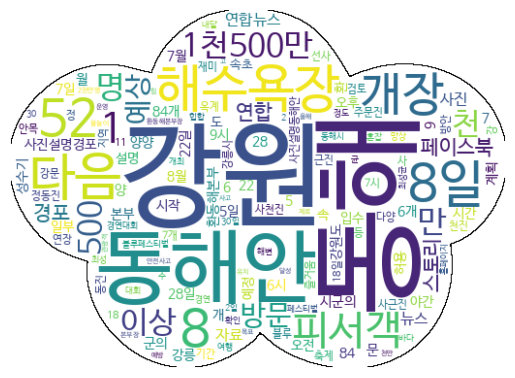

In [22]:
# 마스크 이미지 로드
import numpy as np
from PIL import Image
from os import path
import os
import requests
from io import BytesIO

response = requests.get("https://raw.githubusercontent.com/zzhining/public_data_analysis/main/dataset/mask-cloud.png")
img = Image.open(BytesIO(response.content))
mask = np.array(img)

# 워드 클라우드 설정
wc2 = WordCloud(background_color="white", mask=mask, contour_width=1, 
              font_path='NanumBarunGothic.ttf')
wc2.generate_from_frequencies(counted_tokens)
# 이미지 표시
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
# 이미지 저장
wc2.to_file("wordcloud.png")